Aluno: Vinicius Santana da Silva Brandão

Disciplina: Introdução a Ciência de Dados

Primeira avaliação Análise de Dados.

Dataset available extracted from: https://coinmarketcap.com/currencies/bitcoin/historical-data/ (feb 17, 2024)<br/>
Execute as células em ordem para que funcionem corretamente.

This dataset contains the Bitcoin historical data, wich will be studied throught this notebook and presented for a data science introduction class evaluation.

For the comparison, the models will be only broadly evaluated, wich means that only the accuracy and/or squared errors will be itinally evaluated, and for the best performing model, a more thorough evaluation will be done.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np



In the first cell, a class will be defined to read and split the data in a controllable fashion 

In [3]:
# Essa classe de importação e separação dos dados foi retirada de projeto feito por mim em outra disciplina.
# Ela possui caracteristicas inutilizadas, mas não serão removidas
class import_datasets:
    def __init__(self):
        self.train = 0
        self.test = 0
        self.validate = 0
    
    def load_train_data(self):
        dataset = pd.read_csv('train.csv')
        self.train_data = dataset
        return dataset

    def load_test_data(self):
        dataset = pd.read_csv('test.csv')
        # self.load_test_data = dataset
        return dataset

    def custom_train_val_test_split(self, X, y, test1_size, test_size, random_state):
        np.random.seed(random_state)
        shuffled_indices = np.random.permutation(len(X))
        
        val_set_size = int(len(X) * test1_size)
        test_set_size = int(len(X) * test_size)
        
        val_indices = shuffled_indices[:val_set_size]
        test_indices = shuffled_indices[val_set_size : val_set_size + test_set_size]
        train_indices = shuffled_indices[val_set_size + test_set_size:]
        
        X_train, X_val, X_test = X.iloc[train_indices], X.iloc[val_indices], X.iloc[test_indices]
        y_train, y_val, y_test = y.iloc[train_indices], y.iloc[val_indices], y.iloc[test_indices]

        self.X_train = X_train
        self.X_val = X_val
        self.X_test = X_test
        self.y_train = y_train
        self.y_val = y_val
        self.y_test = y_test
        
        X_train = pd.DataFrame(X_train)
        
        return  X_train.values.tolist(), X_val.values.tolist(), X_test.values.tolist(),\
                y_train.values.tolist(), y_val.values.tolist(), y_test.values.tolist()


Aqui será feita a separação entre o valor de abertura do bitcoin no dia, que queremos avaliar, dos outros dados, e a remoção de dados sobre datas e horários que serão desconsiderados de acordo com a orientação para o projeto.

In the second cell, the separation between the X and y will take place, y is the predicted value and X the data used to predict y. Here time and date related data will also be removed, acording to the demands given for this project.

In [4]:
test1_size = 0.1
test_size = 0.1
random_state = 133

p = import_datasets()
train_data = p.load_train_data()


X = train_data.drop(['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'open', 'timestamp', 'name'], axis=1)
y = train_data['open']

print(X.columns.tolist())  # Print remaining labels in X
print(X.head(1))  # Print only the first line of X

X_train, X_val, X_test, y_train, y_val, y_test = p.custom_train_val_test_split(X, y, test1_size, test_size, random_state)


['high', 'low', 'close', 'volume', 'marketCap', 'index']
           high           low         close        volume     marketCap  index
0  52537.970228  51641.367219  52160.202829  2.818057e+10  1.023894e+12     61


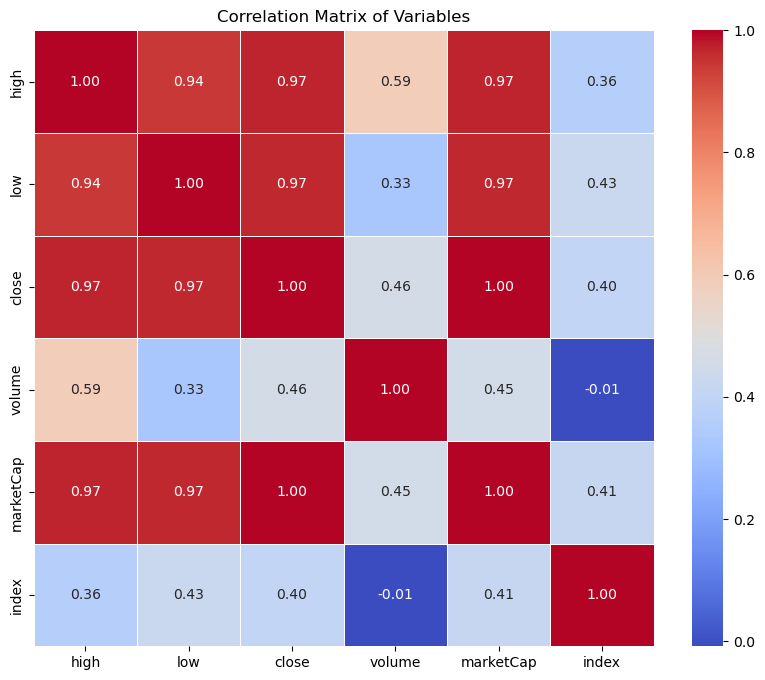

In [5]:

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Variables')
plt.show()

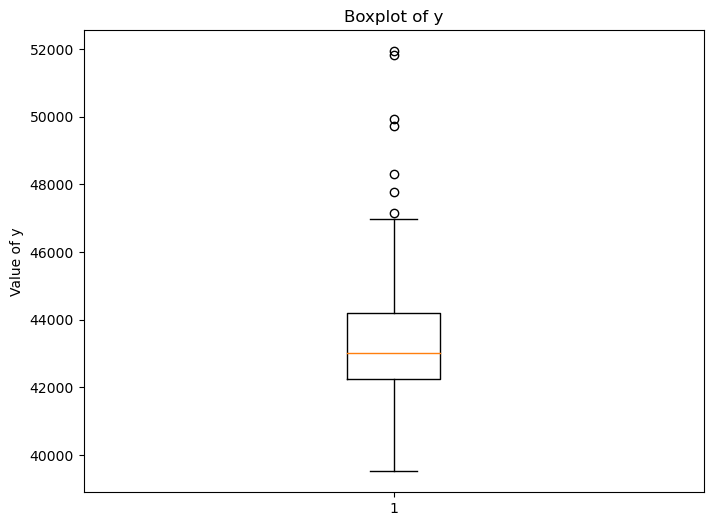

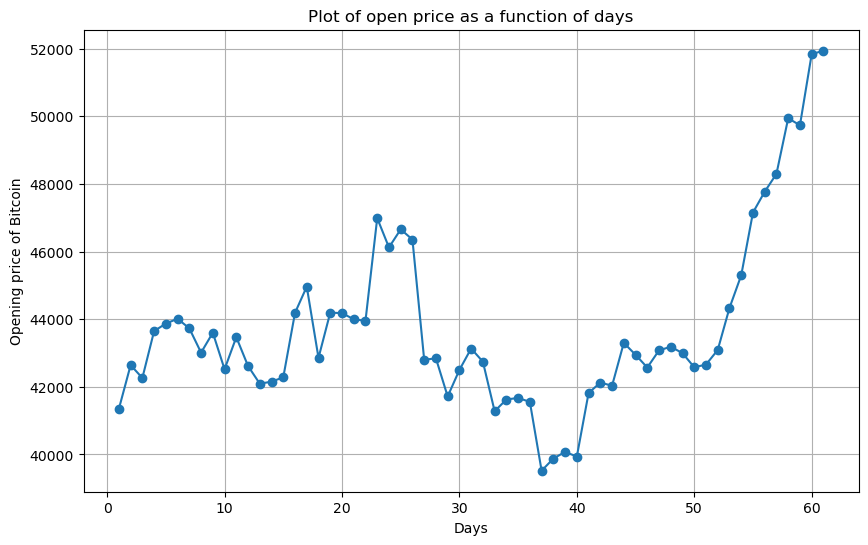

In [6]:
# Boxplot for y
plt.figure(figsize=(8, 6))
plt.boxplot(y)
plt.title('Boxplot of y')
plt.ylabel('Value of y')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(train_data['index'], train_data['open'], marker='o', linestyle='-')
plt.title('Plot of open price as a function of days')
plt.xlabel('Days')
plt.ylabel('Opening price of Bitcoin')
plt.grid(True)
plt.show()

/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_in

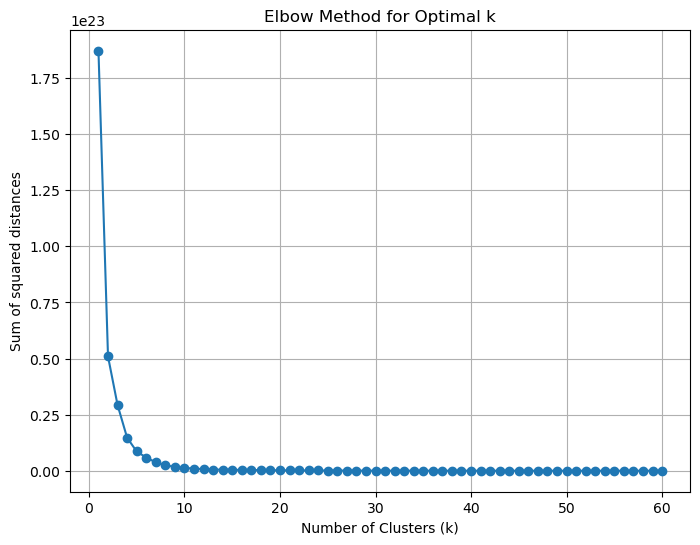

+------------------------+--------------------------+
| Number of Clusters (k) | Sum of Squared Distances |
+------------------------+--------------------------+
|           1            |         1.87e+23         |
|           2            |         5.09e+22         |
|           3            |         2.93e+22         |
|           4            |         1.47e+22         |
|           5            |         8.59e+21         |
|           6            |         5.87e+21         |
|           7            |         3.76e+21         |
|           8            |         2.46e+21         |
|           9            |         1.68e+21         |
|           10           |         1.26e+21         |
|           11           |         9.49e+20         |
|           12           |         7.34e+20         |
|           13           |         5.34e+20         |
|           14           |         4.76e+20         |
|           15           |         4.32e+20         |
|           16           |  

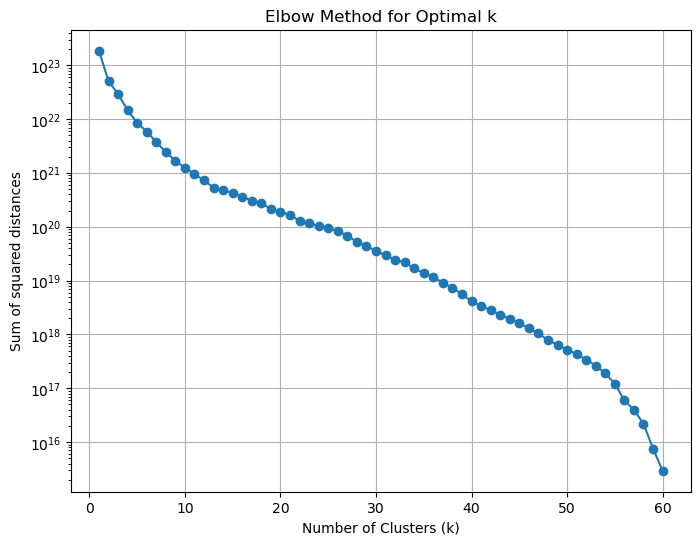

In [23]:
clusters_range = range(1, 61)

inertia_values = []
for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)  
    inertia_values.append(kmeans.inertia_) #the inertia is the sum of squared distances

plt.figure(figsize=(8, 6))
plt.plot(clusters_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of squared distances')
plt.grid(True)
plt.show()


table = PrettyTable()
table.field_names = ['Number of Clusters (k)', 'Sum of Squared Distances']

# Populate the table with data
for n_clusters, inertia in zip(clusters_range, inertia_values):
    table.add_row([n_clusters, '{:.2e}'.format(inertia)]) 

# Print the table
print(table)


plt.figure(figsize=(8, 6))
plt.plot(clusters_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of squared distances')
plt.grid(True)
plt.yscale('log')  # Set logarithmic scale
plt.show()




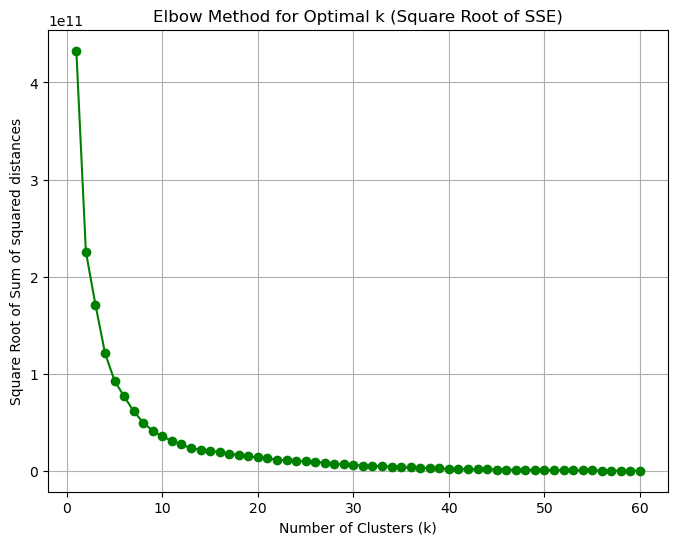

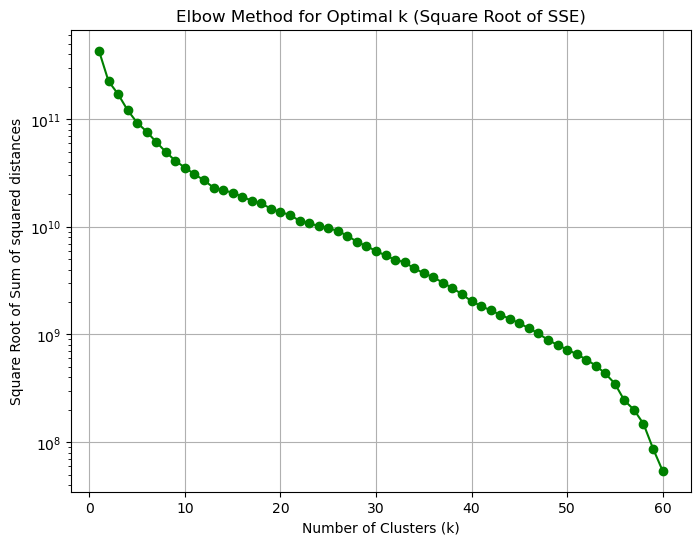

+------------------------+--------------------+
| Number of Clusters (k) | Square Root of SSE |
+------------------------+--------------------+
|           1            |      4.33e+11      |
|           2            |      2.26e+11      |
|           3            |      1.71e+11      |
|           4            |      1.21e+11      |
|           5            |      9.27e+10      |
|           6            |      7.66e+10      |
|           7            |      6.13e+10      |
|           8            |      4.96e+10      |
|           9            |      4.10e+10      |
|           10           |      3.55e+10      |
|           11           |      3.08e+10      |
|           12           |      2.71e+10      |
|           13           |      2.31e+10      |
|           14           |      2.18e+10      |
|           15           |      2.08e+10      |
|           16           |      1.91e+10      |
|           17           |      1.75e+10      |
|           18           |      1.65e+10

In [24]:
# Compute the square root of SSE values
sqrt_inertia_values = np.sqrt(inertia_values)

# Plot the graph with square root of SSE on a linear scale
plt.figure(figsize=(8, 6))
plt.plot(clusters_range, sqrt_inertia_values, marker='o', color='green')
plt.title('Elbow Method for Optimal k (Square Root of SSE)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Square Root of Sum of squared distances')
plt.grid(True)
plt.show()

# Plot the graph with square root of SSE on a logarithmic scale
plt.figure(figsize=(8, 6))
plt.plot(clusters_range, sqrt_inertia_values, marker='o', color='green')
plt.title('Elbow Method for Optimal k (Square Root of SSE)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Square Root of Sum of squared distances')
plt.grid(True)
plt.yscale('log')  # Set logarithmic scale on the y-axis
plt.show()


sqrt_table = PrettyTable()

# Define the column names
sqrt_table.field_names = ['Number of Clusters (k)', 'Square Root of SSE']

# Populate the table with data
for n_clusters, sqrt_inertia in zip(clusters_range, sqrt_inertia_values):
    sqrt_table.add_row([n_clusters, '{:.2e}'.format(sqrt_inertia)]) 

# Print the table
print(sqrt_table)



Through the application of k-means clustering, it becomes apparent that its utility is limited due to the considerable magnitude of the sum of quadratic errors incurred. Even with the inclusion of k = n (n being the elements on the dataset), this method did not provide any useful result to this application. K-means clustering is inherently more adept at partitioning data into clusters, and thus its application in this context is and is shown as unsuitable. K-means in scenarios necessitating overarching or broad contextual extrapolation and temporal predictions, such as this one.

Given the temporal nature of the dataset, I shall opt for regression analysis to elucidate underlying trends and patterns. This approach is deemed more fitting, so I will be avoiding methods developed for clustering and classification, such as k-means, k-nearest neighbors (knn), and support vector machine (svm).

Pela aplicação do k-means, vemos que a sua aplicação é pouco útil dada a magnitude dos erros, que mesmo ao colocarmos o dataset inteiro, não temos um erro que nos inspire confiança no método utilizado. O k-means é melhor utilizado para agrupamentos, portanto esta aplicação serve para demostrar que ele não foi útil nesse cenário, onde precisava extrapolar um contexto e fazer predições temporais.

Por se tratar de uma série histórica, vou utilizar uma regressão para estudar o movimento, ao invés de utilizar métodos que são melhores para agrupamentos e classificação como kmeans, knn e svm .

Now a regression method will be build and applied, in this case, the chosen regression is Multiple Linear Regression (MLR). 

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Standardize the features
X_standardized = (X - X.mean()) / X.std()

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=123)

# Create and train the linear regression model
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Make predictions on the test set
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("PCA Regression Results:\n")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (Coefficient of Determination): {r2}\n")


# Extract coefficients and standard errors
coefficients = model.params
standard_errors = model.bse
# Display the DataFrame
results_p = pd.DataFrame({
    'Coefficient': coefficients,
    'Standard Error': standard_errors,
})
print(results_p)
print()


# Print the results
print("Summary of the OLS model:")
print(model.summary())

PCA Regression Results:

Mean Squared Error: 89872.846127955
Root Mean Squared Error: 299.78800197465375
R-squared (Coefficient of Determination): 0.9401530122598398

         Coefficient  Standard Error
const   43703.542940       79.366161
x1       1209.176565       34.762245
x2        136.297904       76.345626
x3        291.034591      110.706531
x4      -3211.955411      445.703848
x5       1520.960328      669.882746
x6    -346911.676023   182102.104608

Summary of the OLS model:
                            OLS Regression Results                            
Dep. Variable:                   open   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     214.8
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           2.42e-29
Time:                        22:23:21   Log-Likelihood:                -365.82
No. Observations:                  4

In [9]:
# Calculate the mean of the actual target values (y)
y_mean = y_test.mean()

# Calculate SST
sst = np.sum((y_test - y_mean) ** 2)

# Calculate SSE
sse = np.sum((y_pred - y_mean) ** 2)

# Calculate SSR
ssr = np.sum((y_test - y_pred) ** 2)

# Output the results
print(f"\nSST (Total Sum of Squares): {sst}")
print(f"SSE (Explained Sum of Squares): {sse}")
print(f"SSR (Residual Sum of Squares): {ssr}")



SST (Total Sum of Squares): 19522235.684376772
SSE (Explained Sum of Squares): 20449238.245509256
SSR (Residual Sum of Squares): 1168346.999663415


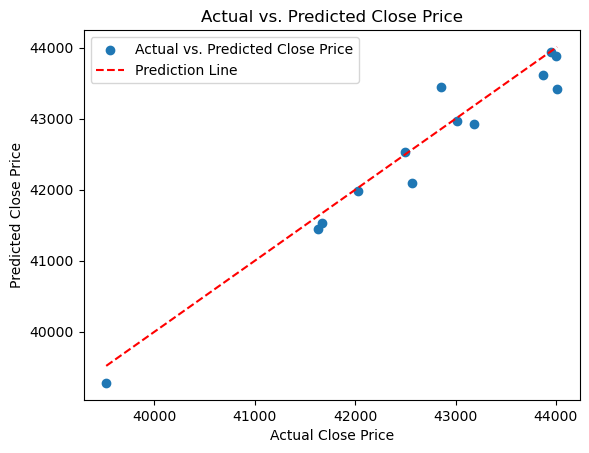

In [10]:
# Plot the results
plt.scatter(y_test, y_pred, label='Actual vs. Predicted Close Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Prediction Line')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs. Predicted Close Price')
plt.legend()
plt.show()


It is important to note that the predictions were not made from an extrapolation of the datapoints and from the correlation matrix, the correlation between most of the data is Extremely high. So the expect result is extremely accurate, from the correlation alone, the result will only be inacurate if the last day is an outlier, witch is not the case.  

In [11]:

# Standardize the features
X_standardized = (X - X.mean()) / X.std()

x_train2 = X[1:]  # First row, all columns except the last one
y_train2 = y[1:]   # First row, last column

x_test2 = X[:1:]  # From second row till end, all columns except the last one
y_test2 = y[:1:]   # From second row till end, last column



# Create and train the linear regression model
model = sm.OLS(y_train2, x_train2).fit()

# Make predictions on the test set
X_test_constantw = sm.add_constant(x_test2)
y_pred2 = model.predict(x_test2)


# Evaluate the model
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test2, y_pred2)

print(f'Predicted value: {y_pred2}')
print(f'Real value: {y_test2}\n')



# Print the coefficients of the regression
print("Coefficients of the Regression:")
print(model.params)
print()

# print the results
print("Summary of the OLS model:")
print(model.summary())

print(f"\nMean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (Coefficient of Determination): {r2}") #



Predicted value: 0    51600.046136
dtype: float64
Real value: 0    51937.726914
Name: open, dtype: float64

Coefficients of the Regression:
high         1.089454e+00
low          6.424153e-01
close        8.013030e+00
volume      -1.141453e-08
marketCap   -4.467804e-07
index        1.644495e+01
dtype: float64

Summary of the OLS model:
                                 OLS Regression Results                                
Dep. Variable:                   open   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.336e+04
Date:                Sun, 18 Feb 2024   Prob (F-statistic):                   1.01e-103
Time:                        22:23:21   Log-Likelihood:                         -456.01
No. Observations:                  60   AIC:                                      924.0
Df Residuals:                      54   BIC:  

/usr/lib/python3/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


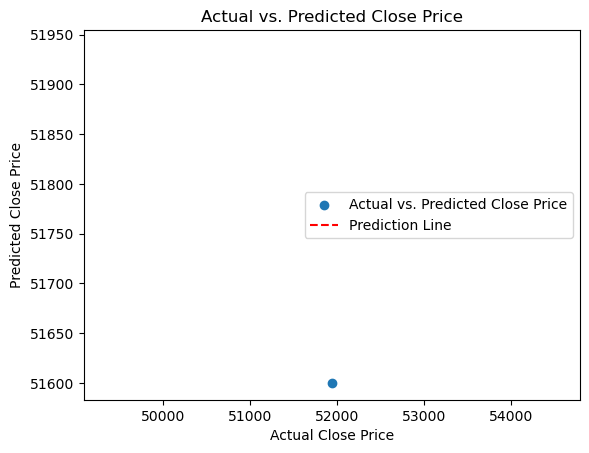

0    51600.046136
dtype: float64


In [12]:
# Plot the results
plt.scatter(y_test2, y_pred2, label='Actual vs. Predicted Close Price')
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], '--', color='red', label='Prediction Line')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs. Predicted Close Price')
plt.legend()
plt.show()

print(y_pred2)
# print(y_)


Now changing y to be the volume and applying the same method

In [13]:
p = import_datasets()
train_data = p.load_train_data()


X = train_data.drop(['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'volume', 'timestamp', 'name'], axis=1)
y = train_data['volume']

print(X.columns.tolist())  # Print remaining labels in X
print(X.head(1))  # Print only the first line of X

X_train, X_val, X_test, y_train, y_val, y_test = p.custom_train_val_test_split(X, y, test1_size, test_size, random_state)


['open', 'high', 'low', 'close', 'marketCap', 'index']
           open          high           low         close     marketCap  index
0  51937.726914  52537.970228  51641.367219  52160.202829  1.023894e+12     61


In [14]:

# Standardize the features
X_standardized = (X - X.mean()) / X.std()

x_train2 = X[1:]  # First row, all columns except the last one
y_train2 = y[1:]   # First row, last column

x_test2 = X[:1:]  # From second row till end, all columns except the last one
y_test2 = y[:1:]   # From second row till end, last column



# Create and train the linear regression model
model = sm.OLS(y_train2, x_train2).fit()

# Make predictions on the test set
X_test_constantw = sm.add_constant(x_test2)
y_pred2 = model.predict(x_test2)


# Evaluate the model
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test2, y_pred2)

print(f'Predicted value: {y_pred2}')
print(f'Real value: {y_test2}\n')



# Print the coefficients of the regression
print("Coefficients of the Regression:")
print(model.params)
print()

# print the results
print("Summary of the OLS model:")
print(model.summary())

print(f"\nMean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (Coefficient of Determination): {r2}") #



/usr/lib/python3/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Predicted value: 0    2.688833e+10
dtype: float64
Real value: 0    2.818057e+10
Name: volume, dtype: float64

Coefficients of the Regression:
open        -8.726155e+05
high         9.751516e+06
low         -6.930827e+06
close       -2.446136e+08
marketCap    1.241236e+01
index       -5.252830e+08
dtype: float64

Summary of the OLS model:
                                 OLS Regression Results                                
Dep. Variable:                 volume   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              355.0
Date:                Sun, 18 Feb 2024   Prob (F-statistic):                    1.59e-41
Time:                        22:23:21   Log-Likelihood:                         -1415.0
No. Observations:                  60   AIC:                                      2842.
Df Residuals:                      54   BIC:

Now we will test for a logistic regression